In [37]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [38]:
import numpy as np
import pandas as pd
import datetime as dt

### Reflect Tables into SQLAlchemy ORM

In [39]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, inspect

In [40]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///../../../working/10-Advanced-Data-Storage-and-Retrieval/Homework/Instructions/Resources/hawaii.sqlite")

In [41]:
Base = automap_base()

In [42]:
#Reflect existing database into new model
Base.prepare(engine, reflect=True)

In [43]:
#Print all classes mapped to Base
Base.classes.keys()

['measurement', 'station']

In [45]:
#Inspecting Database
inspector = inspect(engine)
inspector.get_table_names()

['measurement', 'station']

In [46]:
#Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [47]:
# Create a session
session = Session(engine)

In [48]:
#Create a connection for our dataframe
conn = engine.connect()

In [49]:
# Query all records in the the Database
measurement_df = pd.read_sql("SELECT * FROM measurement", conn)
measurement_df

,id,station,date,prcp,tobs
0,1,USC00519397,2010-01-01,0.08,65.0
1,2,USC00519397,2010-01-02,0.00,63.0
2,3,USC00519397,2010-01-03,0.00,74.0
3,4,USC00519397,2010-01-04,0.00,76.0
4,5,USC00519397,2010-01-06,NaN,73.0
...,...,...,...,...,...
19545,19546,USC00516128,2017-08-19,0.09,71.0
19546,19547,USC00516128,2017-08-20,NaN,78.0
19547,19548,USC00516128,2017-08-21,0.56,76.0
19548,19549,USC00516128,2017-08-22,0.50,76.0


In [50]:
# Using the inspector to print the column names within the 'measurement' table and each column's types
columns = inspector.get_columns('measurement')
for column in columns:
    print(column["name"], column["type"])

id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


### Precipitation Analysis

In [51]:
#Finding most recent data
session.query(Measurement.date).order_by(Measurement.date.desc()).first()

('2017-08-23')

In [52]:
#Getting precipitation for given months (last year)
year_precip = session.query(Measurement.date, Measurement.prcp).filter(Measurement.date < '2017-08-23').filter(Measurement.date >= '2016-08-23').all()
year_precip

[('2016-08-23', 0.0),
 ('2016-08-24', 0.08),
 ('2016-08-25', 0.08),
 ('2016-08-26', 0.0),
 ('2016-08-27', 0.0),
 ('2016-08-28', 0.01),
 ('2016-08-29', 0.0),
 ('2016-08-30', 0.0),
 ('2016-08-31', 0.13),
 ('2016-09-01', 0.0),
 ('2016-09-02', 0.0),
 ('2016-09-03', 0.0),
 ('2016-09-04', 0.03),
 ('2016-09-05', None),
 ('2016-09-06', None),
 ('2016-09-07', 0.05),
 ('2016-09-08', 0.0),
 ('2016-09-09', 0.03),
 ('2016-09-10', 0.0),
 ('2016-09-11', 0.05),
 ('2016-09-12', 0.0),
 ('2016-09-13', 0.02),
 ('2016-09-14', 1.32),
 ('2016-09-15', 0.42),
 ('2016-09-16', 0.06),
 ('2016-09-17', 0.05),
 ('2016-09-18', 0.0),
 ('2016-09-19', 0.0),
 ('2016-09-20', 0.0),
 ('2016-09-21', 0.0),
 ('2016-09-22', 0.02),
 ('2016-09-23', 0.0),
 ('2016-09-24', 0.0),
 ('2016-09-25', 0.0),
 ('2016-09-26', 0.06),
 ('2016-09-27', 0.02),
 ('2016-09-28', 0.0),
 ('2016-09-29', 0.0),
 ('2016-09-30', 0.0),
 ('2016-10-01', 0.0),
 ('2016-10-02', 0.0),
 ('2016-10-03', 0.0),
 ('2016-10-04', 0.0),
 ('2016-10-05', 0.0),
 ('2016-10-06'

In [53]:
#Creating new dataframe from our query
new_df = pd.DataFrame(year_precip)

#Dropping any null values
new_df = new_df.dropna()

#Setting date as our index
new_df = new_df.set_index('date')
new_df.head()

,prcp
date,
2016-08-23,0.00
2016-08-24,0.08
2016-08-25,0.08
2016-08-26,0.00
2016-08-27,0.00


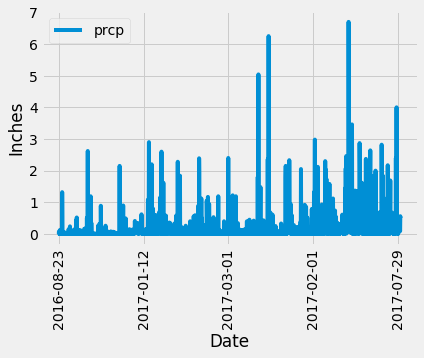

In [70]:
#Graphing our dataframe
prcp_graph = new_df.plot(rot = 90)
plt.xlabel("Date")
plt.ylabel("Inches")
prcp_graph

In [71]:
#Printing summary statistics 
summary_stats = new_df.describe()
summary_stats

,prcp
count,2017.000000
mean,0.177367
std,0.461568
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


### Station Analysis

In [72]:
#Creating dataframe from station table
station_df = pd.read_sql("SELECT * FROM station", conn)
station_df

,id,station,name,latitude,longitude,elevation
0,1,USC00519397,"WAIKIKI 717.2, HI US",21.27160,-157.81680,3.0
1,2,USC00513117,"KANEOHE 838.1, HI US",21.42340,-157.80150,14.6
2,3,USC00514830,"KUALOA RANCH HEADQUARTERS 886.9, HI US",21.52130,-157.83740,7.0
3,4,USC00517948,"PEARL CITY, HI US",21.39340,-157.97510,11.9
4,5,USC00518838,"UPPER WAHIAWA 874.3, HI US",21.49920,-158.01110,306.6
5,6,USC00519523,"WAIMANALO EXPERIMENTAL FARM, HI US",21.33556,-157.71139,19.5
6,7,USC00519281,"WAIHEE 837.5, HI US",21.45167,-157.84889,32.9
7,8,USC00511918,"HONOLULU OBSERVATORY 702.2, HI US",21.31520,-157.99920,0.9
8,9,USC00516128,"MANOA LYON ARBO 785.2, HI US",21.33310,-157.80250,152.4


In [73]:
#Calculating total number of stations in dataset
num_of_stations = session.query(Station).filter(Station.id).count()
print(num_of_stations)

9


In [74]:
#Finding most active stations (which stations have the most rows?)
stations = session.query(Measurement.station, func.count(Measurement.station)).group_by(Measurement.station).order_by(func.count(Measurement.station).desc()).all()
stations

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [75]:
#Which station has highest number of observations?
most_active_id = stations[0][0]
most_active_id

'USC00519281'

In [77]:
#Most active station lowest temp
lowest_temp = session.query(func.min(Measurement.tobs)).filter_by(station = most_active_id).all()
lowest_temp

[(54.0)]

In [78]:
#Most active station highest temp
highest_temp = session.query(func.max(Measurement.tobs)).filter_by(station = most_active_id).all()
highest_temp

[(85.0)]

In [79]:
#Most active station avg temp
avg_temp = session.query(func.avg(Measurement.tobs)).filter_by(station = most_active_id).all()
avg_temp

[(71.66378066378067)]

In [80]:
#Changing date column to a datetime column
measurement_df['date'] = pd.to_datetime(measurement_df['date'])

#Finding our most recent date
start_date = measurement_df['date'].max()
end_date = start_date - dt.timedelta(days=365)

#Putting in correct format
start_date = start_date.strftime("%Y-%m-%d")
end_date = end_date.strftime("%Y-%m-%d")
print(start_date)
print(end_date)

2017-08-23
2016-08-23


In [81]:
#Getting temperatures for the last 12 months
last_year_temp = session.query(Measurement.date, Measurement.tobs).filter(Measurement.date < start_date).filter(Measurement.date >= end_date).filter_by(station = most_active_id).all()
last_year_temp

[('2016-08-23', 77.0),
 ('2016-08-24', 77.0),
 ('2016-08-25', 80.0),
 ('2016-08-26', 80.0),
 ('2016-08-27', 75.0),
 ('2016-08-28', 73.0),
 ('2016-08-29', 78.0),
 ('2016-08-30', 77.0),
 ('2016-08-31', 78.0),
 ('2016-09-01', 80.0),
 ('2016-09-02', 80.0),
 ('2016-09-03', 78.0),
 ('2016-09-04', 78.0),
 ('2016-09-05', 78.0),
 ('2016-09-06', 73.0),
 ('2016-09-07', 74.0),
 ('2016-09-08', 80.0),
 ('2016-09-09', 79.0),
 ('2016-09-10', 77.0),
 ('2016-09-11', 80.0),
 ('2016-09-12', 76.0),
 ('2016-09-13', 79.0),
 ('2016-09-14', 75.0),
 ('2016-09-15', 79.0),
 ('2016-09-16', 78.0),
 ('2016-09-17', 79.0),
 ('2016-09-18', 78.0),
 ('2016-09-19', 78.0),
 ('2016-09-20', 76.0),
 ('2016-09-21', 74.0),
 ('2016-09-22', 77.0),
 ('2016-09-23', 78.0),
 ('2016-09-24', 79.0),
 ('2016-09-25', 79.0),
 ('2016-09-26', 77.0),
 ('2016-09-27', 80.0),
 ('2016-09-28', 78.0),
 ('2016-09-29', 78.0),
 ('2016-09-30', 78.0),
 ('2016-10-01', 77.0),
 ('2016-10-02', 79.0),
 ('2016-10-03', 79.0),
 ('2016-10-04', 79.0),
 ('2016-10-

In [82]:
#Putting data from our query in a dataframe
date_tobs_df = pd.DataFrame(last_year_temp)
date_tobs_df.head()

,date,tobs
0,2016-08-23,77.0
1,2016-08-24,77.0
2,2016-08-25,80.0
3,2016-08-26,80.0
4,2016-08-27,75.0


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fa99000c2e8>]],
      dtype=object)

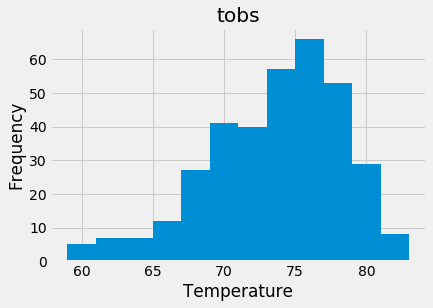

In [83]:
#Plotting histogram
date_tobs_hist = date_tobs_df.hist(bins = 12)
plt.xlabel("Temperature")
plt.ylabel("Frequency")
date_tobs_hist

In [84]:
#Close the session
session.close()